In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import xarray.coding.cftimeindex

In [3]:
dataset = pd.read_csv('./archive/IPL Matches 2008-2020.csv')
dataset.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan


In [60]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19 entries, 40 to 667
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               19 non-null     int64  
 1   city             19 non-null     object 
 2   date             19 non-null     object 
 3   player_of_match  19 non-null     object 
 4   venue            19 non-null     object 
 5   neutral_venue    19 non-null     float64
 6   team1            19 non-null     object 
 7   team2            19 non-null     object 
 8   toss_winner      19 non-null     int64  
 9   toss_decision    19 non-null     object 
 10  winner           19 non-null     float64
 11  result           19 non-null     object 
 12  result_margin    19 non-null     float64
 13  eliminator       19 non-null     object 
 14  method           19 non-null     object 
 15  umpire1          19 non-null     object 
 16  umpire2          19 non-null     object 
dtypes: float64(3), i

In [61]:
dataset.isnull().sum()

id                 0
city               0
date               0
player_of_match    0
venue              0
neutral_venue      0
team1              0
team2              0
toss_winner        0
toss_decision      0
winner             0
result             0
result_margin      0
eliminator         0
method             0
umpire1            0
umpire2            0
dtype: int64

In [4]:
dataset['winner'].value_counts()


Mumbai Indians                 120
Chennai Super Kings            106
Kolkata Knight Riders           99
Royal Challengers Bangalore     91
Kings XI Punjab                 88
Rajasthan Royals                81
Delhi Daredevils                67
Sunrisers Hyderabad             66
Deccan Chargers                 29
Delhi Capitals                  19
Gujarat Lions                   13
Pune Warriors                   12
Rising Pune Supergiant          10
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
Name: winner, dtype: int64

<AxesSubplot:>

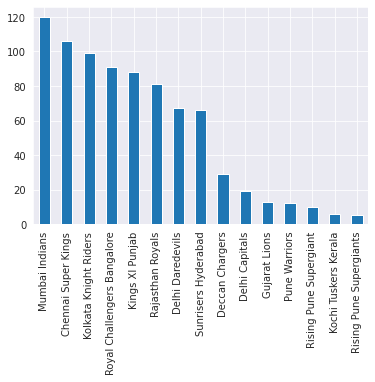

In [5]:
dataset['winner'].value_counts().plot(kind='bar')

In [6]:
dataset['winner'].value_counts()


Mumbai Indians                 120
Chennai Super Kings            106
Kolkata Knight Riders           99
Royal Challengers Bangalore     91
Kings XI Punjab                 88
Rajasthan Royals                81
Delhi Daredevils                67
Sunrisers Hyderabad             66
Deccan Chargers                 29
Delhi Capitals                  19
Gujarat Lions                   13
Pune Warriors                   12
Rising Pune Supergiant          10
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
Name: winner, dtype: int64

<AxesSubplot:>

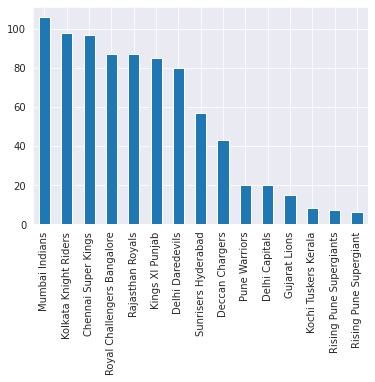

In [7]:
dataset['toss_winner'].value_counts().plot(kind='bar')

In [8]:
dataset['toss_winner'].value_counts()

Mumbai Indians                 106
Kolkata Knight Riders           98
Chennai Super Kings             97
Royal Challengers Bangalore     87
Rajasthan Royals                87
Kings XI Punjab                 85
Delhi Daredevils                80
Sunrisers Hyderabad             57
Deccan Chargers                 43
Pune Warriors                   20
Delhi Capitals                  20
Gujarat Lions                   15
Kochi Tuskers Kerala             8
Rising Pune Supergiants          7
Rising Pune Supergiant           6
Name: toss_winner, dtype: int64

<AxesSubplot:>

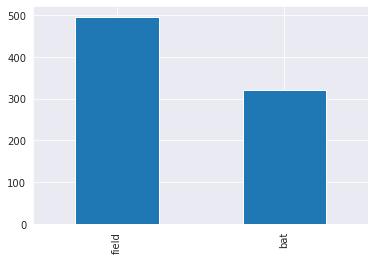

In [9]:
dataset['toss_decision'].value_counts().plot(kind='bar')

In [10]:
dataset['toss_decision'].value_counts()

field    496
bat      320
Name: toss_decision, dtype: int64

<AxesSubplot:>

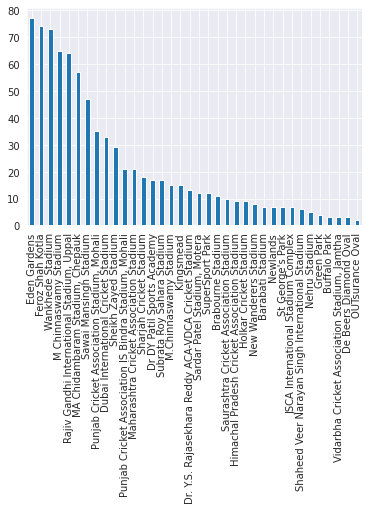

In [11]:
dataset['venue'].value_counts().plot(kind='bar')

In [12]:
dataset['venue'].value_counts()

Eden Gardens                                            77
Feroz Shah Kotla                                        74
Wankhede Stadium                                        73
M Chinnaswamy Stadium                                   65
Rajiv Gandhi International Stadium, Uppal               64
MA Chidambaram Stadium, Chepauk                         57
Sawai Mansingh Stadium                                  47
Punjab Cricket Association Stadium, Mohali              35
Dubai International Cricket Stadium                     33
Sheikh Zayed Stadium                                    29
Punjab Cricket Association IS Bindra Stadium, Mohali    21
Maharashtra Cricket Association Stadium                 21
Sharjah Cricket Stadium                                 18
Dr DY Patil Sports Academy                              17
Subrata Roy Sahara Stadium                              17
M.Chinnaswamy Stadium                                   15
Kingsmead                                               

<AxesSubplot:>

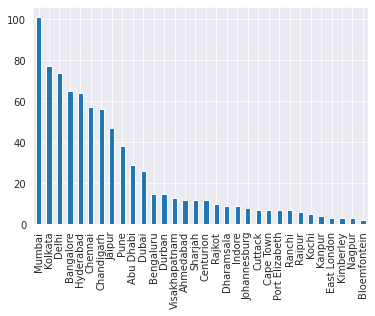

In [13]:
dataset['city'].value_counts().plot(kind='bar')

In [14]:
dataset['city'].value_counts()

Mumbai            101
Kolkata            77
Delhi              74
Bangalore          65
Hyderabad          64
Chennai            57
Chandigarh         56
Jaipur             47
Pune               38
Abu Dhabi          29
Dubai              26
Bengaluru          15
Durban             15
Visakhapatnam      13
Ahmedabad          12
Sharjah            12
Centurion          12
Rajkot             10
Dharamsala          9
Indore              9
Johannesburg        8
Cuttack             7
Cape Town           7
Port Elizabeth      7
Ranchi              7
Raipur              6
Kochi               5
Kanpur              4
East London         3
Kimberley           3
Nagpur              3
Bloemfontein        2
Name: city, dtype: int64

<AxesSubplot:>

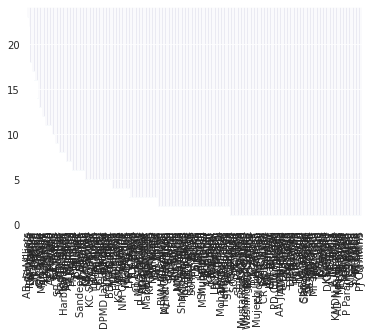

In [15]:
dataset['player_of_match'].value_counts().plot(kind='bar')

In [16]:
dataset['player_of_match'].value_counts()

AB de Villiers    23
CH Gayle          22
RG Sharma         18
DA Warner         17
MS Dhoni          17
                  ..
S Anirudha         1
M Kartik           1
R McLaren          1
RJ Harris          1
PJ Cummins         1
Name: player_of_match, Length: 233, dtype: int64

<AxesSubplot:>

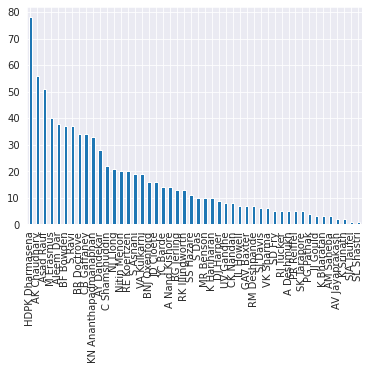

In [17]:
dataset['umpire1'].value_counts().plot(kind='bar')

In [18]:
dataset['umpire1'].value_counts()

HDPK Dharmasena          78
AK Chaudhary             56
Asad Rauf                51
M Erasmus                40
Aleem Dar                38
BF Bowden                37
S Ravi                   37
BR Doctrove              34
CB Gaffaney              34
KN Ananthapadmanabhan    33
AY Dandekar              28
C Shamshuddin            22
NJ Llong                 21
Nitin Menon              20
RE Koertzen              20
S Asnani                 19
VA Kulkarni              19
BNJ Oxenford             16
JD Cloete                16
YC Barde                 14
A Nand Kishore           14
BG Jerling               13
RK Illingworth           13
SS Hazare                11
S Das                    10
MR Benson                10
K Hariharan              10
DJ Harper                 9
UV Gandhe                 8
CK Nandan                 8
IL Howell                 7
GAV Baxter                7
RM Deshpande              7
SJ Davis                  6
VK Sharma                 6
SD Fry              

<AxesSubplot:>

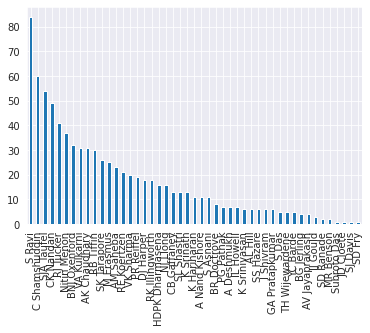

In [19]:
dataset['umpire2'].value_counts().plot(kind='bar')

In [20]:
dataset['umpire2'].value_counts()

S Ravi             84
C Shamshuddin      60
SJA Taufel         54
CK Nandan          49
RJ Tucker          41
Nitin Menon        37
BNJ Oxenford       32
VA Kulkarni        31
AK Chaudhary       31
RB Tiffin          30
SK Tarapore        26
M Erasmus          25
AM Saheba          23
RE Koertzen        21
VK Sharma          20
PR Reiffel         19
DJ Harper          18
RK Illingworth     18
HDPK Dharmasena    16
NJ Llong           16
CB Gaffaney        13
SL Shastri         13
K Srinath          13
K Hariharan        11
A Nand Kishore     11
S Asnani           11
BR Doctrove         8
PG Pathak           7
A Deshmukh          7
IL Howell           7
K Srinivasan        6
AL Hill             6
SS Hazare           6
I Shivram           6
GA Pratapkumar      6
S Das               5
TH Wijewardene      5
YC Barde            5
BG Jerling          4
AV Jayaprakash      4
IJ Gould            3
SD Ranade           2
MR Benson           2
Subroto Das         1
JD Cloete           1
SJ Davis  

In [21]:
#seaborn graph visualization


<AxesSubplot:xlabel='winner', ylabel='count'>

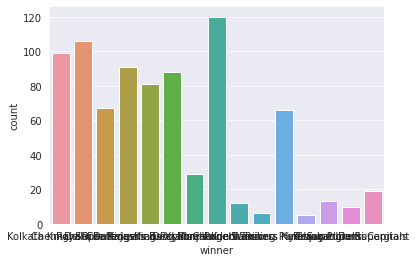

In [22]:
import seaborn as sns
sns.countplot(x='winner', data=dataset)


<AxesSubplot:xlabel='toss_winner', ylabel='count'>

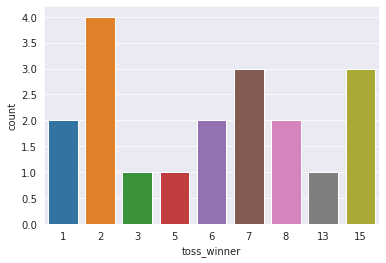

In [43]:
sns.countplot(x='toss_winner', data=dataset)

<AxesSubplot:xlabel='toss_decision', ylabel='count'>

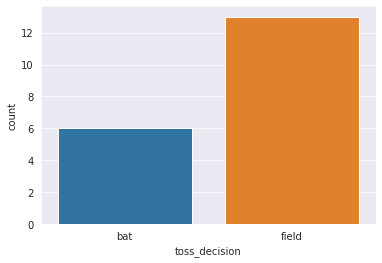

In [44]:
sns.countplot(x='toss_decision', data=dataset)

<AxesSubplot:xlabel='toss_winner', ylabel='winner'>

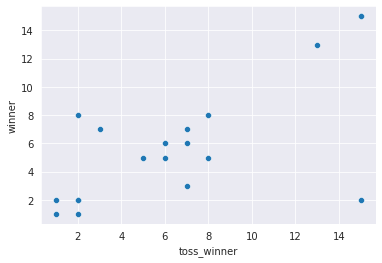

In [46]:
sns.scatterplot(x='toss_winner', y='winner', data=dataset)

<AxesSubplot:xlabel='toss_decision', ylabel='winner'>

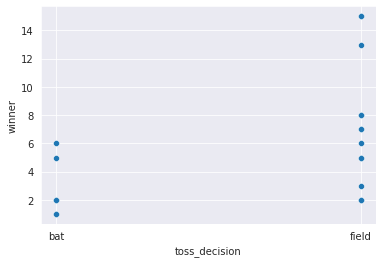

In [47]:
sns.scatterplot(x='toss_decision', y='winner', data=dataset)

<AxesSubplot:xlabel='venue', ylabel='winner'>

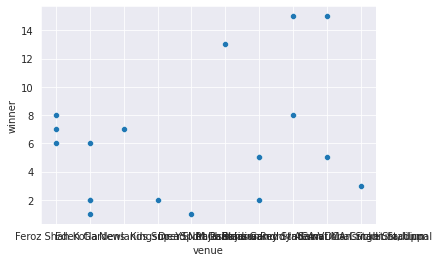

In [48]:
sns.scatterplot(x='venue', y='winner', data=dataset)

<AxesSubplot:>

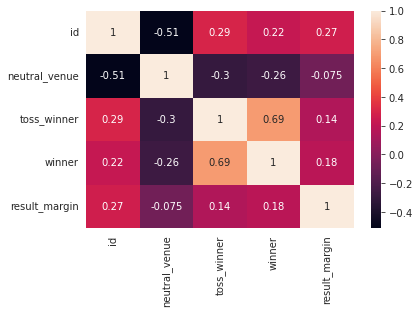

In [49]:
sns.heatmap(dataset.corr(), annot=True)

<AxesSubplot:xlabel='winner', ylabel='toss_winner'>

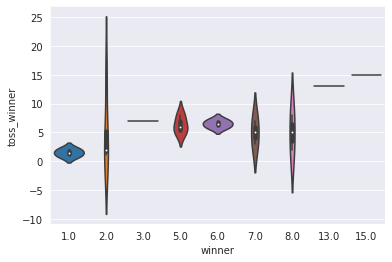

In [50]:
sns.violinplot(x='winner', y='toss_winner', data=dataset)

<AxesSubplot:xlabel='winner', ylabel='toss_decision'>

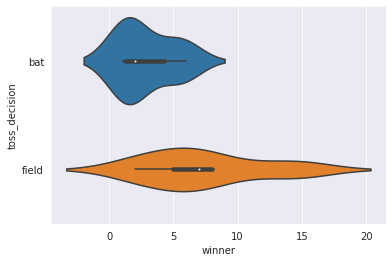

In [51]:
sns.violinplot(x='winner', y='toss_decision', data=dataset)

<AxesSubplot:xlabel='winner', ylabel='venue'>

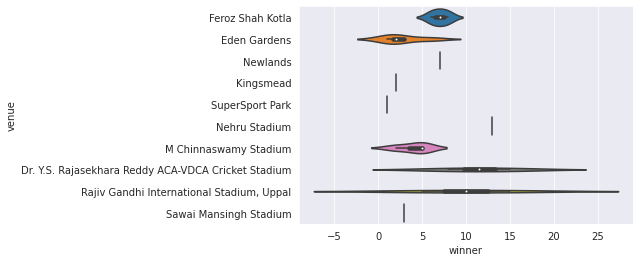

In [52]:
sns.violinplot(x='winner', y='venue', data=dataset)

<AxesSubplot:xlabel='winner', ylabel='toss_winner'>

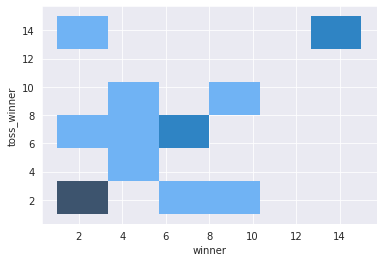

In [53]:
sns.histplot(x='winner', y='toss_winner', data=dataset)

<AxesSubplot:xlabel='winner', ylabel='toss_decision'>

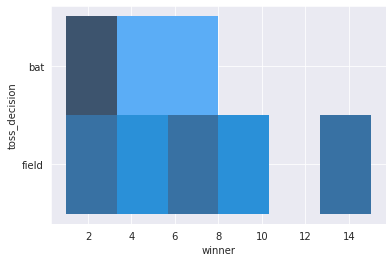

In [54]:
sns.histplot(x='winner', y='toss_decision', data=dataset)

<AxesSubplot:xlabel='winner', ylabel='venue'>

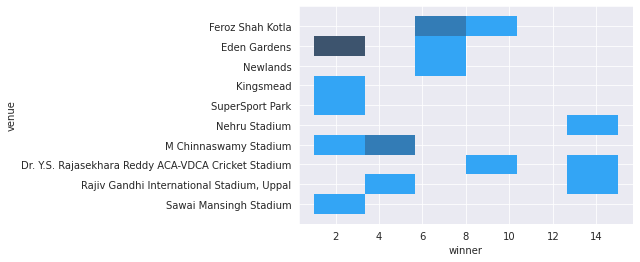

In [55]:
sns.histplot(x='winner', y='venue', data=dataset)

<AxesSubplot:xlabel='winner', ylabel='toss_winner'>

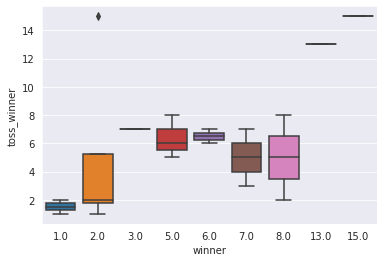

In [56]:
sns.boxplot(x='winner', y='toss_winner', data=dataset)

<AxesSubplot:xlabel='winner', ylabel='toss_decision'>

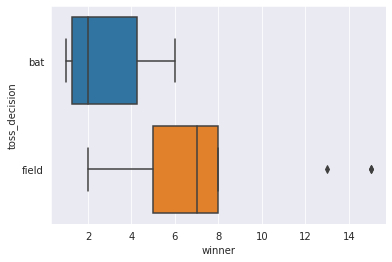

In [57]:
sns.boxplot(x='winner', y='toss_decision', data=dataset)

<AxesSubplot:xlabel='winner', ylabel='venue'>

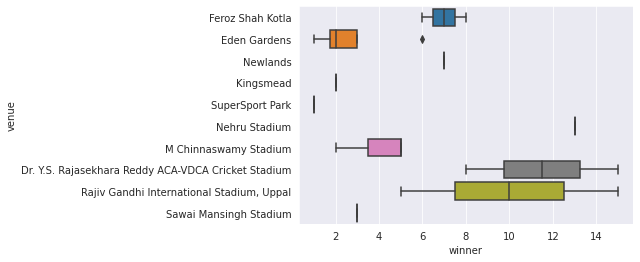

In [58]:
sns.boxplot(x='winner', y='venue', data=dataset)

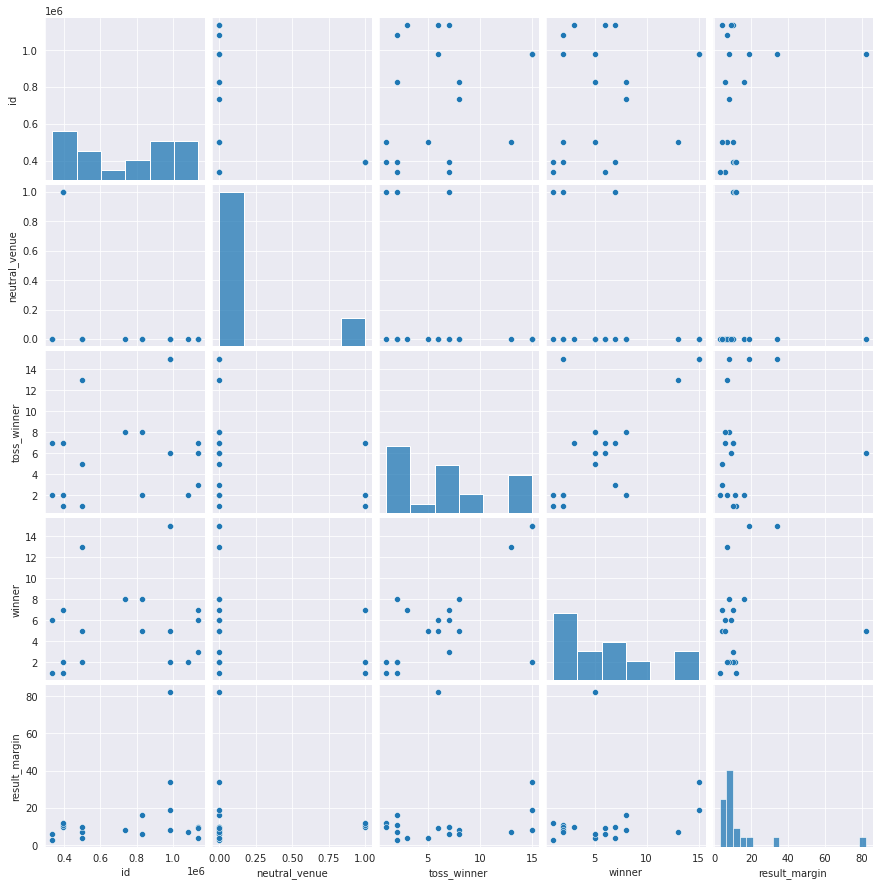

In [59]:
sns.pairplot(dataset)

In [ ]:
#CLUSTERING


In [23]:
#Preprocessing

In [24]:
#Handling missing values

In [25]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer = imputer.fit(dataset.iloc[:, 5:6])
dataset.iloc[:, 5:6] = imputer.transform(dataset.iloc[:, 5:6])

In [26]:
dataset.isnull().sum()

id                   0
city                13
date                 0
player_of_match      4
venue                0
neutral_venue        0
team1                0
team2                0
toss_winner          0
toss_decision        0
winner               4
result               4
result_margin       17
eliminator           4
method             797
umpire1              0
umpire2              0
dtype: int64

In [27]:
#Replace the team name in toss winner with the number of each team

In [28]:
dataset['toss_winner'].replace('Chennai Super Kings', 1, inplace=True)
dataset['toss_winner'].replace('Kolkata Knight Riders', 2, inplace=True)
dataset['toss_winner'].replace('Rajasthan Royals', 3, inplace=True)
dataset['toss_winner'].replace('Mumbai Indians', 4, inplace=True)
dataset['toss_winner'].replace('Royal Challengers Bangalore', 5, inplace=True)
dataset['toss_winner'].replace('Kings XI Punjab', 6, inplace=True)
dataset['toss_winner'].replace('Delhi Daredevils', 7, inplace=True)
dataset['toss_winner'].replace('Sunrisers Hyderabad', 8, inplace=True)
dataset['toss_winner'].replace('Deccan Chargers', 9, inplace=True)
dataset['toss_winner'].replace('Pune Warriors', 10, inplace=True)
dataset['toss_winner'].replace('Gujarat Lions', 11, inplace=True)
dataset['toss_winner'].replace('Rising Pune Supergiant', 12, inplace=True)
dataset['toss_winner'].replace('Kochi Tuskers Kerala', 13, inplace=True)
dataset['toss_winner'].replace('Delhi Capitals', 14, inplace=True)
dataset['toss_winner'].replace('Rising Pune Supergiants', 15, inplace=True)

In [29]:
print(dataset['toss_winner'].value_counts())

4     106
2      98
1      97
5      87
3      87
6      85
7      80
8      57
9      43
10     20
14     20
11     15
13      8
15      7
12      6
Name: toss_winner, dtype: int64


In [30]:
#Replace the team name in winner with the number of each team

In [31]:

dataset['winner'].replace('Chennai Super Kings', 1, inplace=True)
dataset['winner'].replace('Kolkata Knight Riders', 2, inplace=True)
dataset['winner'].replace('Rajasthan Royals', 3, inplace=True)
dataset['winner'].replace('Mumbai Indians', 4, inplace=True)
dataset['winner'].replace('Royal Challengers Bangalore', 5, inplace=True)
dataset['winner'].replace('Kings XI Punjab', 6, inplace=True)
dataset['winner'].replace('Delhi Daredevils', 7, inplace=True)
dataset['winner'].replace('Sunrisers Hyderabad', 8, inplace=True)
dataset['winner'].replace('Deccan Chargers', 9, inplace=True)
dataset['winner'].replace('Pune Warriors', 10, inplace=True)
dataset['winner'].replace('Gujarat Lions', 11, inplace=True)
dataset['winner'].replace('Rising Pune Supergiant', 12, inplace=True)
dataset['winner'].replace('Kochi Tuskers Kerala', 13, inplace=True)
dataset['winner'].replace('Delhi Capitals', 14, inplace=True)
dataset['winner'].replace('Rising Pune Supergiants', 15, inplace=True)


In [32]:
print(dataset['winner'].value_counts())

4.0     120
1.0     106
2.0      99
5.0      91
6.0      88
3.0      81
7.0      67
8.0      66
9.0      29
14.0     19
11.0     13
10.0     12
12.0     10
13.0      6
15.0      5
Name: winner, dtype: int64


In [33]:
#Predicting the winner based on toss winner

In [34]:
X = dataset.iloc[:, 10:11].values
y = dataset.iloc[:, 14:15].values

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [36]:
X = dataset['toss_winner']
y = dataset['winner']

In [37]:
#Remove null infinity and outliers
dataset.replace([np.inf, -np.inf], np.nan, inplace=True)
dataset.dropna(inplace=True)


In [38]:
X = X.values.reshape(-1,1)
y = y.values.reshape(-1,1)


In [39]:
#Support Vector Regression


In [40]:
from sklearn.svm import SVR
regressor = SVR(kernel='rbf')



In [41]:
#Reshaping the data


In [42]:
regressor.fit(X,y)

/home/harsh/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
regressor.score(X_test, y_test)

In [ ]:
y_pred = regressor.predict(X_test)

In [ ]:
y_pred

In [ ]:
y_test

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

In [ ]:
#Comparing the actual and predicted values


In [ ]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df